In [86]:
import tensorflow as tf
import numpy as np

In [87]:
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [98]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [89]:
import matplotlib.pyplot as plt

def plot_pixel_map(image):
    """
    Plots a pixel map of the given image.
    Parameters:
    image (numpy.ndarray): The image to plot, expected to be a 2D array
    28x28 pixels.
    """
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [90]:
tf.keras.backend.clear_session()

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

Note how we are setting the optimizer with a specific learning rate. This is important for controlling how quickly the model learns. The `SGD` optimizer is a common choice for training neural networks, especially when you want to have more control over the learning rate.

In [92]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6398 - loss: 15.1655 - val_accuracy: 0.6908 - val_loss: 0.8159
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7781 - loss: 0.5941 - val_accuracy: 0.7842 - val_loss: 0.5691
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7980 - loss: 0.5256 - val_accuracy: 0.8212 - val_loss: 0.5165
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8243 - loss: 0.4736 - val_accuracy: 0.8287 - val_loss: 0.4826
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8412 - loss: 0.4354 - val_accuracy: 0.8317 - val_loss: 0.4773
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8458 - loss: 0.4166 - val_accuracy: 0.8357 - val_loss: 0.4590
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8486 - loss: 0.4086 - val_accuracy: 0.8412 - val_loss: 0.4531
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8554 - loss: 0.3888 -

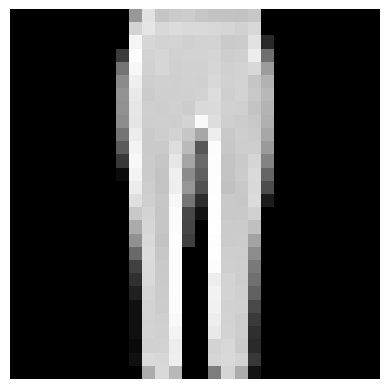

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted class: 1
Prediction probabilities: [[2.03226894e-10 1.00000000e+00 1.21032260e-16 1.94228857e-17
  4.58511276e-17 4.52398414e-35 8.76298197e-22 1.06336186e-23
  4.44054585e-35 4.85983184e-25]]


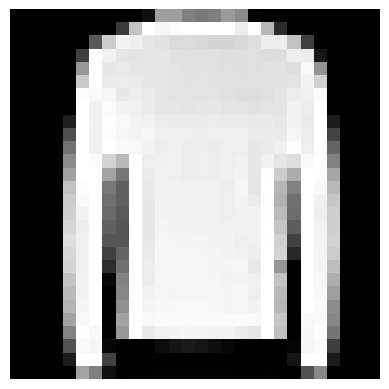

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 2
Prediction probabilities: [[1.0722542e-04 1.0785903e-06 9.9478948e-01 4.6323389e-06 1.7994517e-03
  2.0887209e-14 3.2873510e-03 1.1957894e-11 1.0845310e-05 7.4714857e-10]]


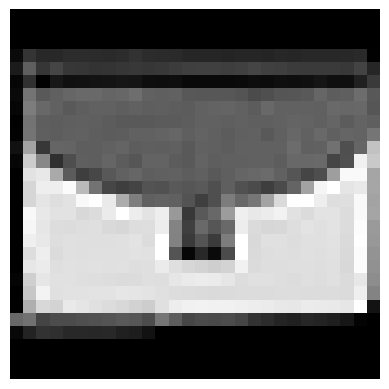

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 8
Prediction probabilities: [[1.6957465e-09 2.4335192e-17 8.9619555e-13 3.2800213e-17 2.6374774e-13
  2.9626018e-10 6.8708723e-09 1.7490737e-14 1.0000000e+00 5.9818782e-11]]


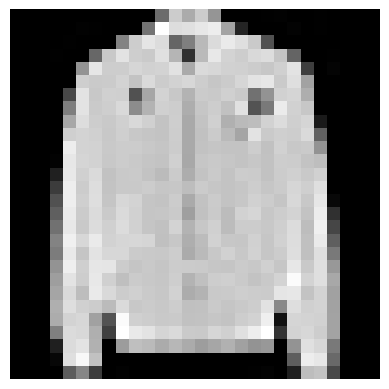

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 4
Prediction probabilities: [[2.5500289e-05 7.9888679e-08 3.5912663e-02 8.4546000e-06 8.7931675e-01
  1.3888470e-07 8.4734730e-02 3.3377130e-09 1.6760147e-06 7.3035684e-09]]


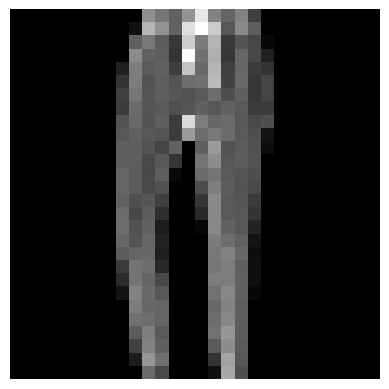

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 1
Prediction probabilities: [[2.8721366e-05 9.9995351e-01 1.2455322e-09 1.6270698e-05 1.4607141e-06
  1.6780289e-14 1.5355666e-07 2.2083629e-10 4.9004929e-11 1.5470592e-13]]


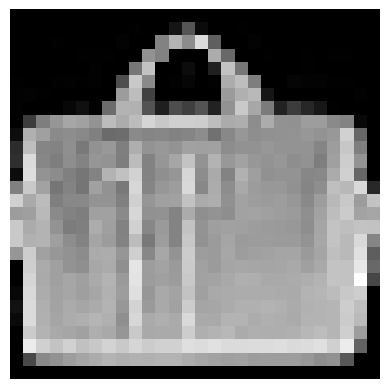

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 8
Prediction probabilities: [[4.6440397e-05 3.1892167e-10 4.7498165e-06 3.6936823e-10 1.1903920e-06
  1.2516434e-06 1.2617621e-04 2.2506514e-08 9.9981672e-01 3.5005421e-06]]


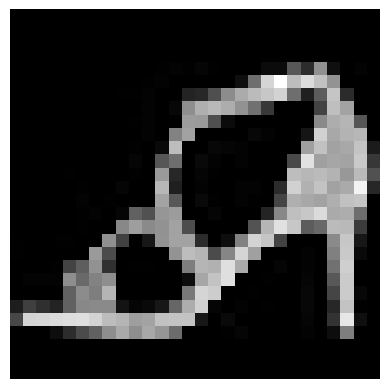

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: 5
Prediction probabilities: [[5.2267481e-23 2.0903721e-24 4.3513968e-23 3.2090279e-26 4.2246098e-20
  1.0000000e+00 7.4444696e-33 1.6291887e-09 4.7057426e-20 8.8686064e-12]]


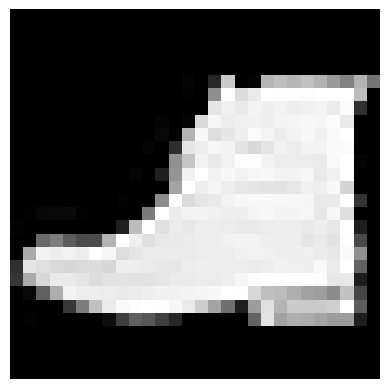

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 9
Prediction probabilities: [[1.8457365e-26 7.0074123e-28 7.7450816e-14 5.7227489e-22 4.0070143e-21
  1.5405992e-09 0.0000000e+00 6.3711474e-07 1.6534247e-23 9.9999940e-01]]


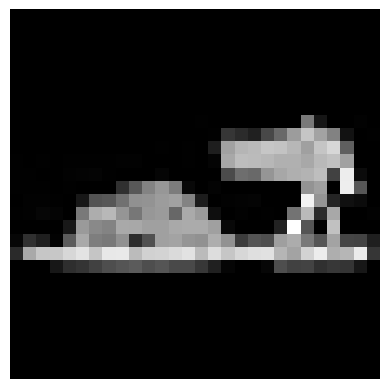

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 5
Prediction probabilities: [[1.5606523e-09 1.5277391e-17 2.6481994e-09 4.2086475e-15 1.3062548e-19
  1.0000000e+00 1.3065083e-20 3.3403285e-09 2.1905290e-12 1.6504698e-16]]


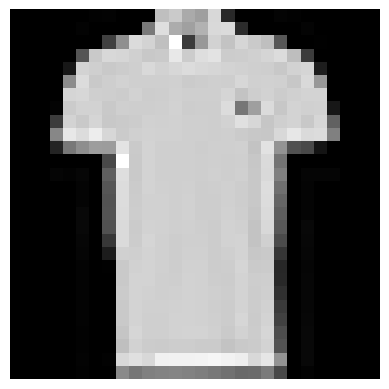

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 0
Prediction probabilities: [[9.9771899e-01 8.4889771e-06 4.0975014e-05 7.3425131e-06 9.0774569e-07
  2.1312125e-25 2.2232393e-03 4.5286098e-16 1.4492231e-09 1.4654243e-18]]


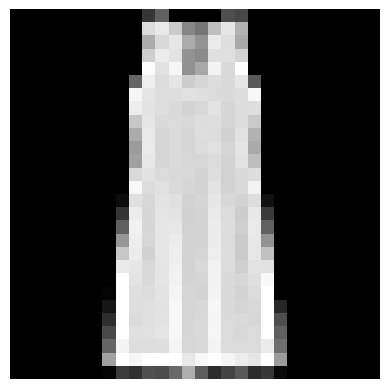

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 3
Prediction probabilities: [[2.79403049e-02 1.31681189e-02 1.11831414e-05 9.57238019e-01
  1.20843135e-04 1.62096102e-14 1.51665253e-03 3.24714877e-09
  4.77803042e-06 1.84911031e-10]]


In [93]:
for item in X_test[76:87]:
    plot_pixel_map(item)
    # item = item.reshape(1, 28, 28)
    prediction = model.predict(item.reshape(1, 28, 28))
    print(f"Predicted class: {np.argmax(prediction)}")
    print(f"Prediction probabilities: {prediction}")

In [94]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

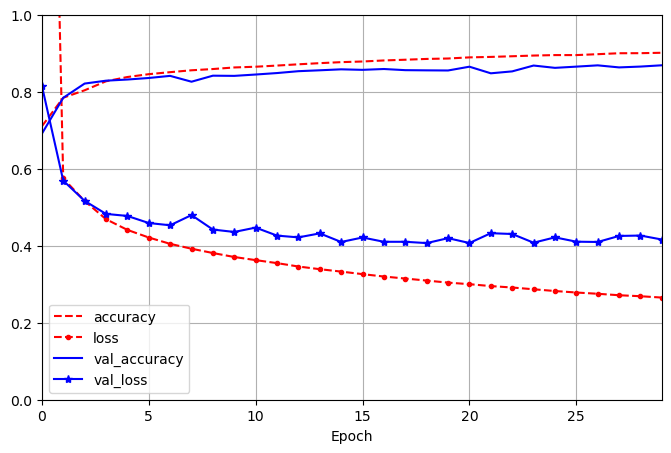

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. This is good. The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there’s a little bit of overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that’s not actually the case. The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch, so the training curve should be shifted by half an epoch to the left.